# Decision Tree

## Desenvolimento do modelo e observações

In [2]:
import pandas as pd

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

### 1. Carregar dados pré-processados

In [3]:
df = pd.read_csv('../../data/home-credit/prepared/train.csv')

### 2. Separar target e features

In [4]:
target = 'TARGET'
X = df.drop(columns=[target])
y = df[target]

### 3. Converter colunas categóricas (Label Encoding)

In [5]:
for col in X.select_dtypes(include=['object']).columns:
    print(X[col])
    X[col] = LabelEncoder().fit_transform(X[col])

### 4. Dividir em treino e teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Criar e treinar o modelo

Apenas 8% das intâncias são da classe alvo essa proporção e isso desbalancei por isso apliquei o argumento class_weight='balanced'

- *The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)) (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)*

In [7]:
classifier = DecisionTreeClassifier(max_depth=20,random_state=42)
classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Análise do modelo
- Antes de remover a multicolinearidade significativa baseando-se no VIF, a sensibilidade estava em 14%. Após essa mudança, observa-se uma grande melhoria na sensibilidade (localizado na tabela abaixo em recall). Porém ainda existia um claro oveffitting devido ao desbalancemento.


In [8]:
accuracy = classifier.score(X_test, y_test)

y_proba = classifier.predict_proba(X_test)[:,1]
print(classification_report(y_test, classifier.predict(X_test)))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

# Plotar árvore
plt.figure(figsize=(100, 100))
plot_tree(classifier, filled=True, max_depth=3, feature_names=X.columns, class_names=['No Default','Default'])
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     56554
           1       0.17      0.09      0.12      4949

    accuracy                           0.89     61503
   macro avg       0.55      0.52      0.53     61503
weighted avg       0.86      0.89      0.88     61503

AUC-ROC: 0.5832545898925484


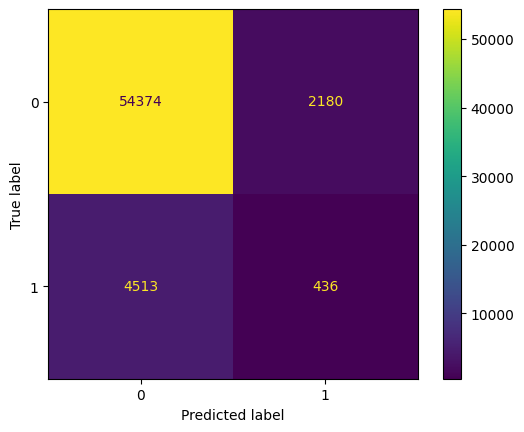

In [9]:
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

### 40 features mais importantes

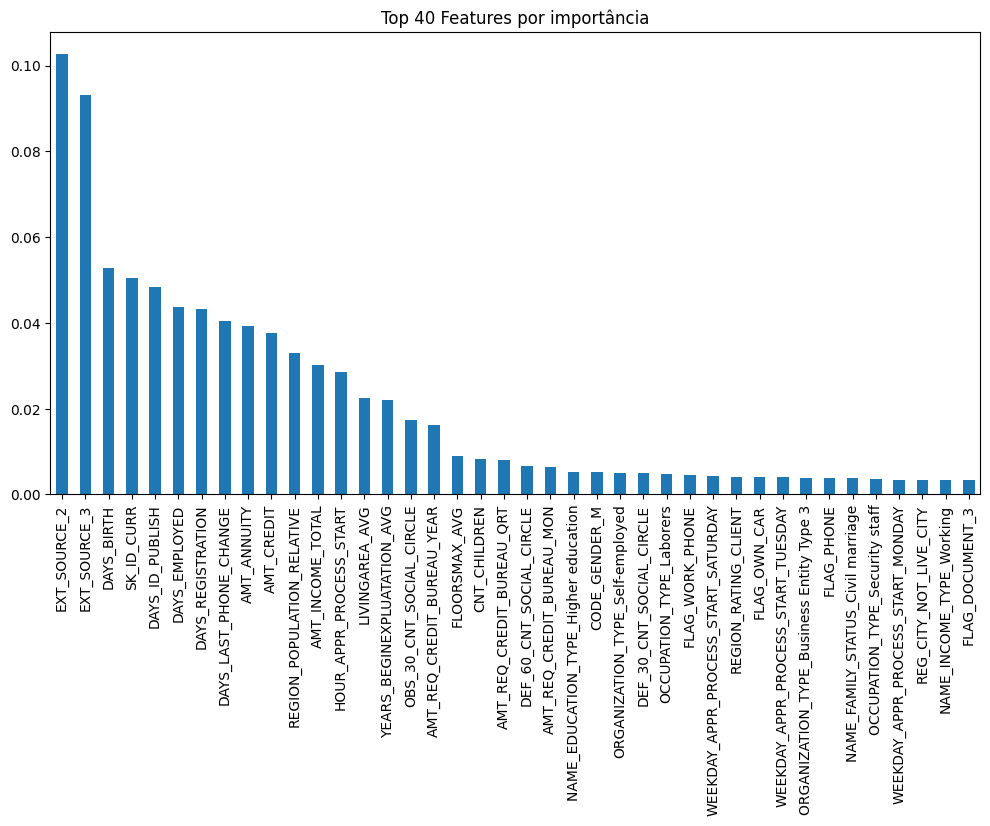

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(classifier.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12,6))
importances.head(40).plot(kind='bar')
plt.title("Top 40 Features por importância")
plt.show()

In [ ]:
smote = SMOTE(random_state=42)
print("Distribuição antes do SMOTE:", y_train.value_counts())
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Distribuição depois do SMOTE:", y_train_smote.value_counts())



Distribuição antes do SMOTE: TARGET
0    226132
1     19876
Name: count, dtype: int64
Distribuição depois do SMOTE: TARGET
0    226132
1    226132
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     56554
           1       0.12      0.19      0.15      4949

    accuracy                           0.82     61503
   macro avg       0.52      0.54      0.53     61503
weighted avg       0.86      0.82      0.84     61503

AUC-ROC: 0.5369821244844672


In [ ]:
classifier = DecisionTreeClassifier(random_state=42, max_depth=4)
classifier.fit(X_train_smote, y_train_smote)

y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     56554
           1       0.14      0.33      0.20      4949

    accuracy                           0.78     61503
   macro avg       0.54      0.58      0.54     61503
weighted avg       0.87      0.78      0.82     61503

AUC-ROC: 0.6492069839097844
